<a href="https://colab.research.google.com/github/ksen0byte/conference-may-2025/blob/main/%D0%90%D0%BD%D0%B0%D0%BB%D1%96%D0%B7_%D1%87%D0%B0%D1%81%D1%83_%D1%81%D0%B5%D0%BD%D1%81%D0%BE%D0%BC%D0%BE%D1%82%D0%BE%D1%80%D0%BD%D0%BE%D1%97_%D1%80%D0%B5%D0%B0%D0%BA%D1%86%D1%96%D1%97_%D1%81%D1%82%D1%83%D0%B4%D0%B5%D0%BD%D1%82%D1%96%D0%B2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 📒 Аналіз часу сенсомоторної реакції студентів
*Демонстраційний приклад для конференції*

##📘Опис
У цьому ноутбуці представлено приклад аналізу симульованих даних простої сенсомоторної реакції (ПСМР) у двох груп студентів (A і B) віком 18–25 років.
Дані аналізуються засобами Python у середовищі Google Colab. Формули оформлено у LaTeX, візуалізація здійснюється через matplotlib.

## 📦 Імпорт бібліотек

In [25]:
# Імпорт необхідних бібліотек
import numpy as np                    # для роботи з масивами та генерації випадкових чисел
import pandas as pd                   # для обробки табличних даних (DataFrame)
import matplotlib.pyplot as plt       # для побудови графіків (лінії, стовпці тощо)
import seaborn as sns                 # для красивих статистичних графіків
from scipy import stats               # для статистичних розрахунків (t-тести, нормальність тощо)
from google.colab import data_table   # для інтерактивних таблиць у Google Colab

# Увімкнення інтерактивного формату таблиць
data_table.enable_dataframe_formatter()


## 🎲 Генерація даних

Ми моделюємо реакції учасників як **випадкові величини**, що мають **нормальний розподіл**:
$$ x \sim \mathcal{N}(\mu, \sigma^2) $$

де:
- $\mu$ — середній (типовий) час реакції в мілісекундах,
- $\sigma$ — стандартне відхилення (розкид),
- $x$ — окрема реакція.

Для кожної групи ми генеруємо `n` реакцій згідно з заданими параметрами.


In [26]:
# @title 🔧 Параметри генерації дани
seed = 42  # @param {type:"integer"}

# Група A
mean_A = 245 # @param {"type":"number"}
std_A = 15  # @param {type:"number"}
n_A = 50 # @param {"type":"slider","min":30,"max":100,"step":10}

# Група B
mean_B = 260  # @param {type:"number"}
std_B = 35  # @param {type:"number"}
n_B = 50  # @param {"type":"slider","min":30,"max":100,"step":10}

# Генерація
np.random.seed(seed)
group_A = np.random.normal(loc=mean_A, scale=std_A, size=n_A)
group_B = np.random.normal(loc=mean_B, scale=std_B, size=n_B)

df = pd.DataFrame({
    'reaction_time': np.concatenate([group_A, group_B]),
    'group': ['A'] * n_A + ['B'] * n_B
})

data_table.DataTable(df, include_index=False, num_rows_per_page=10)


,reaction_time,group
0,252.450712,A
1,242.926035,A
2,254.715328,A
3,267.845448,A
4,241.487699,A
...,...,...
95,208.776977,B
96,270.364210,B
97,269.136935,B
98,260.178971,B


## 🧠 Психофізіологічні характеристики часу реакції

Оцінка часу простої сенсомоторної реакції допомагає визначити функціональний стан нервової системи. Нижче наведено ключові показники:

1. **Середнє (mean)** — типовий час реакції у групі:
   $$ \bar{x} = \frac{1}{n} \sum_{i=1}^{n} x_i $$

2. **Медіана (median)** — центральне значення у впорядкованому ряді:
   > Менш чутлива до аномальних значень (викидів), ніж середнє.

3. **Стандартне відхилення (std)** — розкид значень навколо середнього:
   $$ s = \sqrt{ \frac{1}{n-1} \sum_{i=1}^{n}(x_i - \bar{x})^2 } $$
   > Високе значення вказує на нестабільну або збуджену ЦНС.

4. **Коефіцієнт варіації (CV)** — відносна варіабельність у %:
   $$ CV = \frac{s}{\bar{x}} \times 100\% $$
   > CV < 10% — ознака однорідної групи.




In [27]:
summary = df.groupby('group')['reaction_time'].agg(['mean', 'median', 'std'])
summary['cv (%)'] = (summary['std'] / summary['mean']) * 100
summary


,mean,median,std,cv (%)
group,,,,
A,241.617891,241.487823,14.005032,5.796355
B,260.622330,261.612809,30.601375,11.741655


## 📥 Збереження таблиці у CSV

За бажання, можна зберегти таблицю результатів у csv-файл, що можна у подальшому завантажити чи зберегти у гугл-диску.

In [28]:
summary.to_csv("reaction_summary.csv", index=True)

## 📈 Побудова гістограми

Гістограма відображає, **як часто зустрічається певне значення часу реакції**.
Це дозволяє побачити:

- центр розподілу,
- наявність "піків" (мод),
- симетрію або асиметрію,
- ширину розкиду.

З фізіологічної точки зору, вузький, симетричний розподіл — ознака стабільної ЦНС; широкий або зміщений — прояв нестійкості, втоми або надмірного збудження.


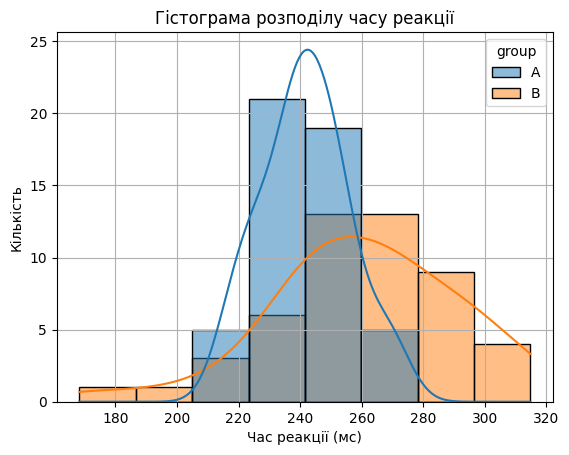

In [29]:
sns.histplot(data=df, x='reaction_time', hue='group', bins='sturges', kde=True)
plt.title('Гістограма розподілу часу реакції')
plt.xlabel('Час реакції (мс)')
plt.ylabel('Кількість')
plt.grid(True)
plt.show()


## 📊 Порівняння середніх значень реакції

Стовпчиковий графік дозволяє чітко побачити:
- Яка з груп має **менший середній час реакції**;
- Наскільки **варіабельність** (стандартне відхилення) висока в кожній групі;
- Чи **перекриваються** діапазони (якщо похибки не перекриваються — це часто означає значущу різницю).

**Похибка (error bar)** на графіку відображає ±1 стандартне відхилення, тобто типову варіацію від середнього значення.

Ми також зберігаємо цей графік у форматі PNG, щоб мати змогу вставити його у звіт або презентацію.

> 🧾 **Збереження графіка:**  
> Графік зберігається під назвою `reaction_time_comparison.png` у кореневій директорії Google Colab.  
> Його можна завантажити вручну (натиснувши на іконку папки зліва → правий клік → Download), або автоматично на Google Drive.


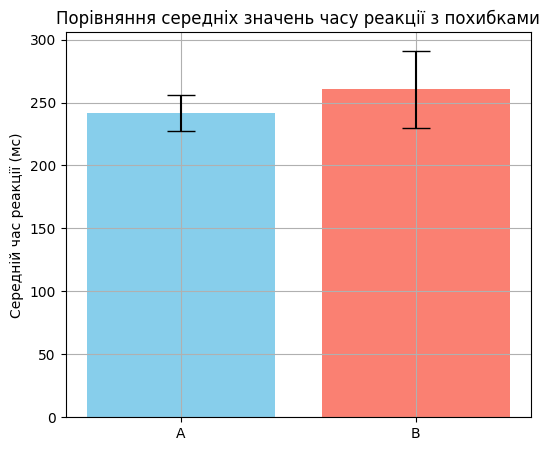

In [30]:
# Побудова стовпчикового графіка середнього часу реакції з похибкою (std)
means = df.groupby("group")["reaction_time"].mean()
stds = df.groupby("group")["reaction_time"].std()

plt.figure(figsize=(6, 5))
plt.bar(means.index, means.values, yerr=stds.values, capsize=10, color=["skyblue", "salmon"])
plt.ylabel("Середній час реакції (мс)")
plt.title("Порівняння середніх значень часу реакції з похибками")
plt.grid(True)

# 💾 Збереження графіка
plt.savefig("reaction_time_comparison.png", dpi=300)
plt.show()


## ⚖️ Порівняння груп: t-тест Стьюдента

Щоб дізнатись, чи **відрізняються групи A і B за середнім часом реакції**, ми використовуємо t-тест Стьюдента для незалежних вибірок.

Цей тест перевіряє гіпотезу:
- **H₀:** середні значення рівні ($\mu_A = \mu_B$)
- **H₁:** середні значення відмінні ($\mu_A \neq \mu_B$)

### Формула t-критерію:
$$ t = \frac{\bar{x}_1 - \bar{x}_2}{\sqrt{\frac{s_1^2}{n_1} + \frac{s_2^2}{n_2}}} $$

де:
- $\bar{x}_1$, $\bar{x}_2$ — середні значення в групах A і B,
- $s_1^2$, $s_2^2$ — дисперсії,
- $n_1$, $n_2$ — обсяги вибірок.

Ми також отримаємо *p-value*, яке вказує, наскільки малоймовірним є отриманий результат при H₀.
Якщо **p < 0.05**, вважається, що різниця є **статистично значущою**.


In [33]:
t_stat, p_value = stats.ttest_ind(group_A, group_B)
print(f"t = {t_stat:.2f}, p = {p_value:.5f}")

t = -3.99, p = 0.00013


## ✅ Висновок

Група A має **менший середній час реакції** та **нижчу варіабельність**, що свідчить про більш стабільну нервову регуляцію.

Статистичний тест підтверджує, що ця різниця не випадкова (**p < 0.05**).  
Інструменти Python і Google Colab ефективно підтримують аналіз та візуалізацію таких біологічних даних.
